<a href="https://colab.research.google.com/github/fidanismayilzada23/ML-Projects/blob/main/Boston_Housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Amaç: Konut fiyatını sosyo-ekonomik ve çevresel değişkenlere göre tahmin etmek.

In [2]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("arunjangir245/boston-housing-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'boston-housing-dataset' dataset.
Path to dataset files: /kaggle/input/boston-housing-dataset


In [6]:
import os

path = "/kaggle/input/boston-housing-dataset"
os.listdir(path)

['BostonHousing.csv']

In [7]:
import pandas as pd

df = pd.read_csv(path + "/BostonHousing.csv")

Data Description

In [8]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


crim: Per capita crime rate by town.

zn: Proportion of large residential lots (over 25,000 sq. ft.).

indus: Proportion of non-retail business acres per town.

Chas: Binary variable indicating if the property is near Charles River (1 for yes, 0 for no).

nox: Concentration of nitrogen oxides in the air.

rm: Average number of rooms per dwelling.

age: Proportion of old owner-occupied units built before 1940.

dis: Weighted distances to Boston employment centers.

rad: Index of accessibility to radial highways.

tax: Property tax rate per $10,000.


In [ ]:
df.shape

(506, 14)

In [ ]:
df.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')

In [ ]:
df.dtypes

,0
crim,float64
zn,float64
indus,float64
chas,int64
nox,float64
rm,float64
age,float64
dis,float64
rad,int64
tax,int64


In [ ]:
df.nunique()

,0
crim,504
zn,26
indus,76
chas,2
nox,81
rm,441
age,356
dis,412
rad,9
tax,66


Missing Values Summary

In [10]:
df["rm"].fillna(df["rm"].median(), inplace=True)

/tmp/ipython-input-1825309349.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["rm"].fillna(df["rm"].median(), inplace=True)


In [11]:
df.isna().sum()

,0
crim,0
zn,0
indus,0
chas,0
nox,0
rm,0
age,0
dis,0
rad,0
tax,0


In [12]:
df[df.isna().any(axis=1)]

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


Descriptive Statistics

In [ ]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.283587,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702126,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.618750,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


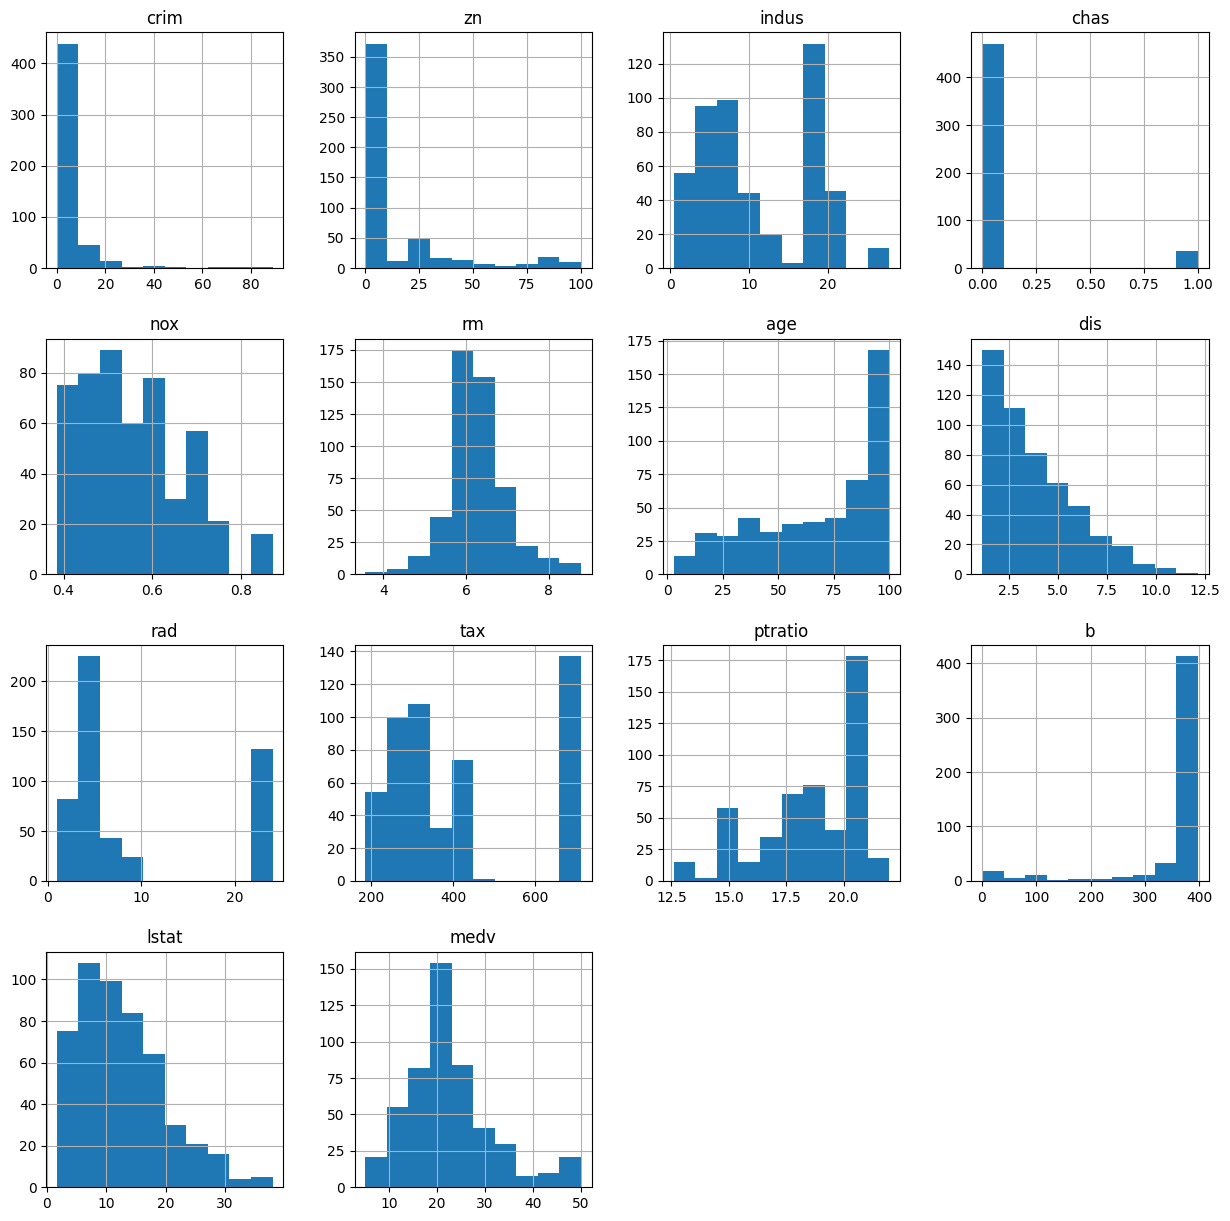

In [15]:
df.hist(figsize=(15,15));

Box Plots

<Axes: ylabel='medv'>

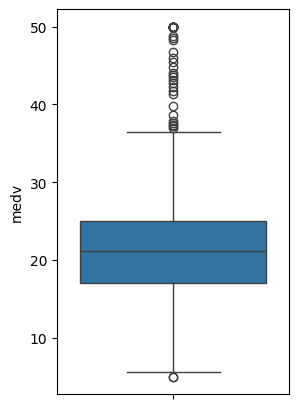

In [ ]:
#median box plot
plt.figure(figsize=(3,5))
sns.boxplot(y="medv",data=df)

<Axes: ylabel='crim'>

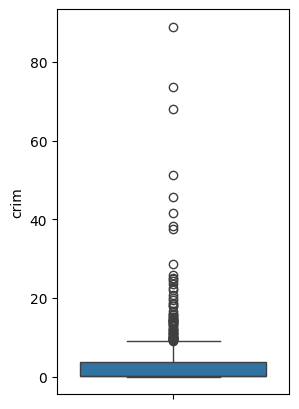

In [ ]:
#crime box plot
plt.figure(figsize=(3,5))
sns.boxplot(y="crim",data=df)

<Axes: ylabel='nox'>

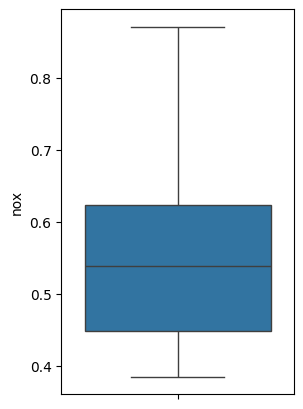

In [ ]:
#nitrit oksid boxplot
plt.figure(figsize=(3,5))
sns.boxplot(y="nox", data=df)

<Axes: ylabel='tax'>

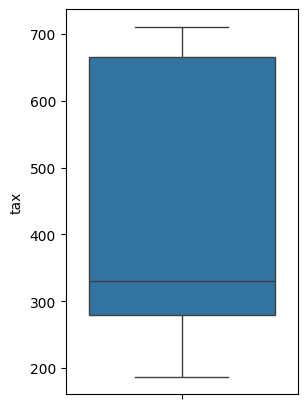

In [ ]:
#tax boxplot
plt.figure(figsize=(3,5))
sns.boxplot(y="tax",data=df)

Price Scatter Graphs

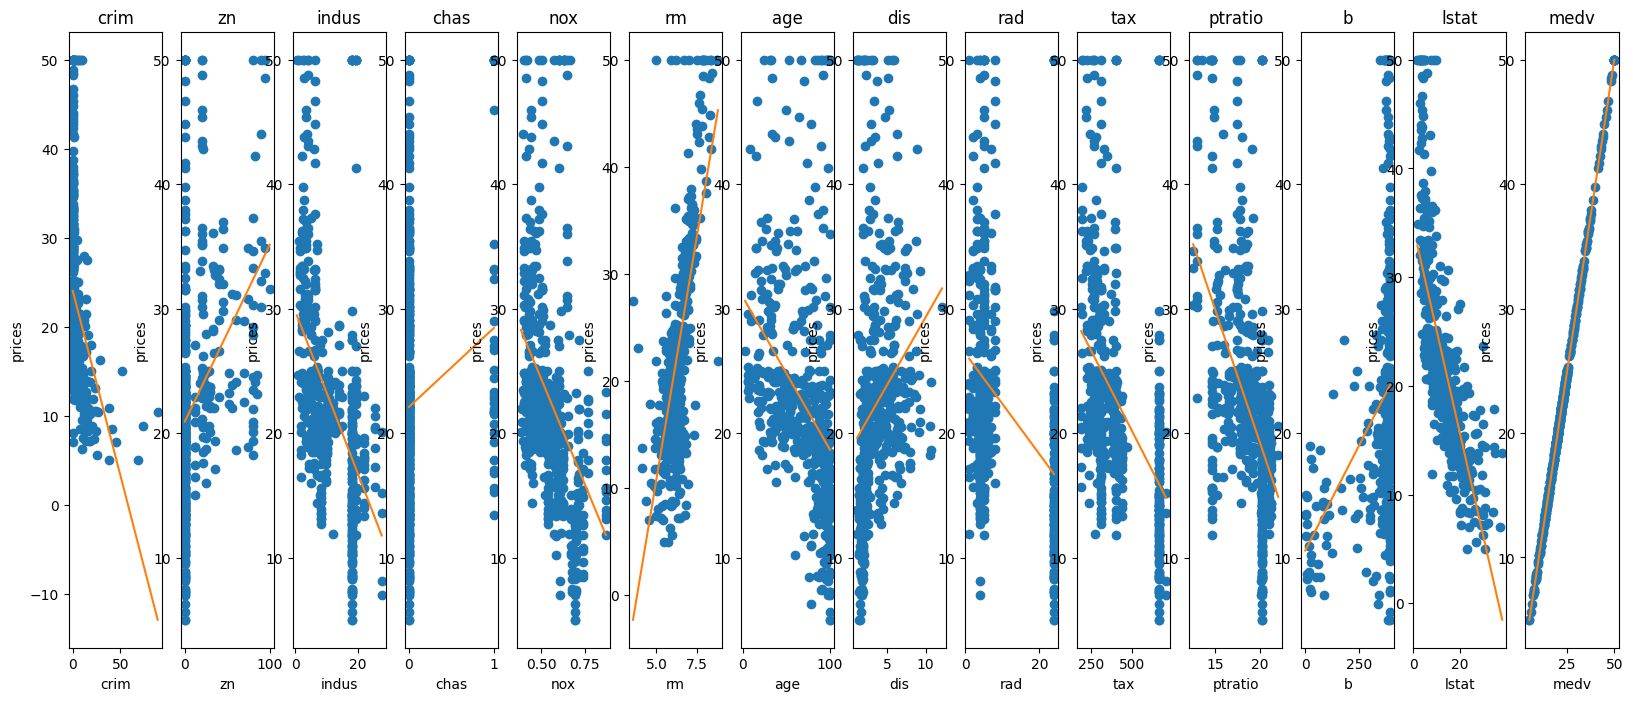

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,8))

for i, col in enumerate(df.columns):
  plt.subplot(1,14,i+1)
  x= df[col]
  y=df['medv']
  plt.plot(x,y,'o')

  plt.plot(np.unique(x),np.poly1d(np.polyfit(x,y,1))(np.unique(x)))
  plt.title(col)
  plt.xlabel(col)
  plt.ylabel('prices')

Correlation Matrix

In [16]:
df.corr(numeric_only=True)['medv'].sort_values(ascending=False)

,medv
medv,1.000000
rm,0.695668
zn,0.360445
b,0.333461
dis,0.249929
chas,0.175260
age,-0.376955
rad,-0.381626
crim,-0.388305
nox,-0.427321


In [18]:
corr=df.corr()
corr.shape

(14, 14)

<Axes: >

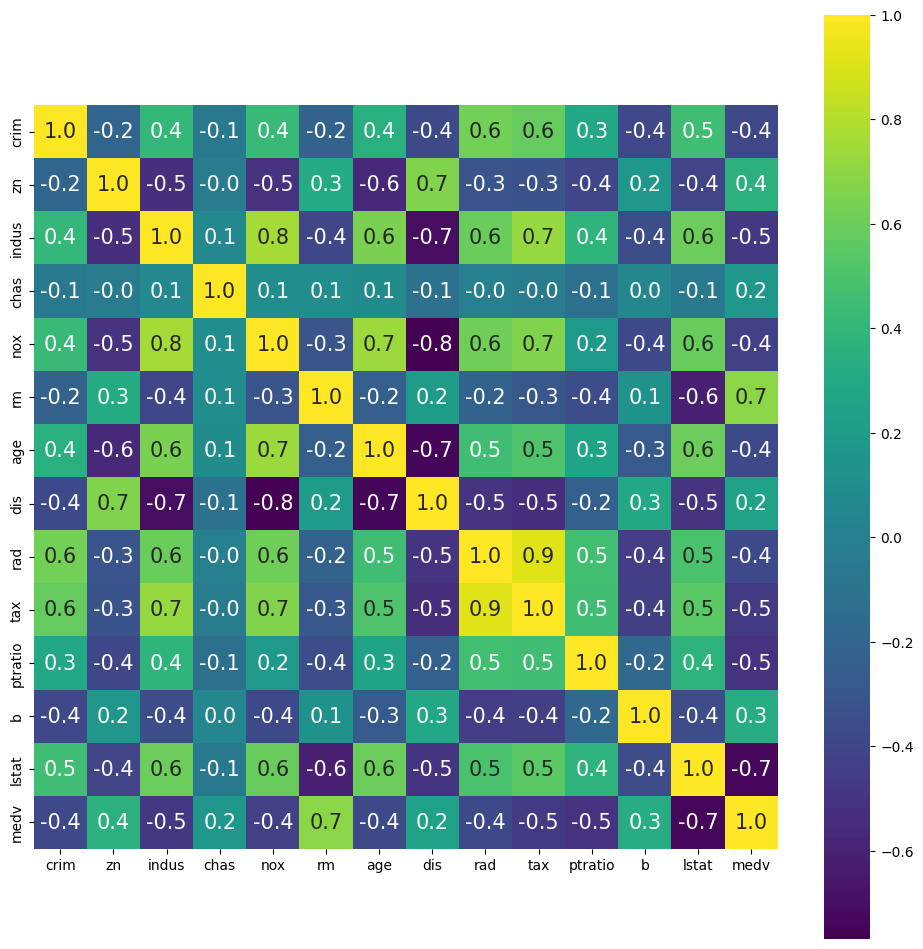

In [19]:
plt.figure(figsize=(12,12))
sns.heatmap(corr,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':15},cmap='viridis')

Linear Regression Uning Sklearn

In [17]:
X= df.drop('medv',axis=1)
y=df['medv'].copy()

In [20]:
from sklearn.linear_model import LinearRegression

lm=LinearRegression()

lm.fit(X,y)

LinearRegression()

In [21]:
#Tüm değişkenler 0 olduğunda ev fiyatı ortalama bu kadar olur
lm.intercept_

np.float64(36.469734292829024)

In [22]:
# Bu ise bir değişkenin evin fiyatlarına nasıl etki etdiğini ölçer. yeni meselen taxın artması ile qiymet arasında ters elaqe var
coeffcients=pd.DataFrame([X.columns,lm.coef_]).T
coeffcients= coeffcients.rename(columns={0:'Attribute',1:'Coefficients'})
coeffcients

,Attribute,Coefficients
0,crim,-0.10809
1,zn,0.046393
2,indus,0.021983
3,chas,2.684377
4,nox,-17.72313
5,rm,3.797127
6,age,0.001053
7,dis,-1.463262
8,rad,0.307699
9,tax,-0.012428


Linear Regression Repeated for Train and Test

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=4)

In [24]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [26]:
num_features=X_train.select_dtypes(include=[np.number]).columns

In [27]:
lm.intercept_

np.float64(35.5421189716256)

In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.preprocessing import PolynomialFeatures


In [35]:
num_pipeline=Pipeline([
    ('imputer',SimpleImputer(strategy='median')),
    ('scaler',StandardScaler())
])

transformer=ColumnTransformer([
    ('num',num_pipeline,num_features)
],remainder='passthrough')
estimator=LinearRegression()

full_pipeline=Pipeline([
    ('transformer',transformer),
    ('estimator',estimator)
])

In [36]:
full_pipeline.fit(X_train,y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat'],
      dtype='object'))])),
                ('estimator', LinearRegression())])

In [39]:
full_pipeline.score(X_test,y_test)

0.7247276918593639

In [38]:
full_pipeline.score(X_train,y_train)

0.7412565331499009

Co-efficients for Training model

In [34]:
coeffcients=pd.DataFrame([X_train.columns,lm.coef_]).T
coeffcients= coeffcients.rename(columns={0:'Attribute',1:'Coefficients'})
coeffcients

,Attribute,Coefficients
0,crim,-0.116012
1,zn,0.047119
2,indus,0.009568
3,chas,3.233219
4,nox,-16.689047
5,rm,3.8827
6,age,-0.010647
7,dis,-1.535272
8,rad,0.293058
9,tax,-0.013401


In [63]:
poly_pipeline=Pipeline([
    ('preprosesing',transformer),
    ('poly',PolynomialFeatures(degree=2, include_bias=False)),
    ('estimator',LinearRegression())
])

In [64]:
poly_pipeline.fit(X_train,y_train)

Pipeline(steps=[('preprosesing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat'],
      dtype='object'))])),
                ('poly', PolynomialFeatures(include_bias=False)),
                ('estimator', LinearRegression())])

In [65]:
poly_pipeline.score(X_test,y_test)

0.8340363249727675

In [66]:
poly_pipeline.score(X_train,y_train)

0.9310045506697683

In [67]:
from sklearn.model_selection import cross_val_score
import numpy as np
cv_scores=cross_val_score(poly_pipeline,X_train,y_train,scoring='r2',cv=5)
print("Cv R2 Scores:",cv_scores)
print("Mean CV R2 Score",np.mean(cv_scores))

Cv R2 Scores: [0.53196142 0.66047465 0.72139407 0.7976701  0.77597892]
Mean CV R2 Score 0.6974958316951689


Ridge Regularization

In [68]:
poly_ridge_piplene=Pipeline([
    ('preprosesing',transformer),
    ('poly',PolynomialFeatures(degree=2, include_bias=False)),
    ('estimator',Ridge(alpha=1))
])

In [69]:
poly_ridge_piplene.fit(X_train,y_train)

Pipeline(steps=[('preprosesing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat'],
      dtype='object'))])),
                ('poly', PolynomialFeatures(include_bias=False)),
                ('estimator', Ridge(alpha=1))])

In [77]:
train_score=poly_ridge_piplene.score(X_train,y_train)
test_score=poly_ridge_piplene.score(X_test,y_test)
print("Train Score:",train_score)
print("Test Score:",test_score)

Train Score: 0.9277897013776516
Test Score: 0.8556404075487472


In [78]:
cv_scores=cross_val_score(poly_ridge_piplene,X_train,y_train,scoring='r2',cv=5)
print("Cv R2 Scores:",cv_scores)
print("Mean CV R2 Score",np.mean(cv_scores))

Cv R2 Scores: [0.70642507 0.82612627 0.80267997 0.85221477 0.77617942]
Mean CV R2 Score 0.7927250990492526


Lasso,ElasticNet

In [79]:
lasso_pipeline=Pipeline([
    ('scaler',transformer),
    ('poly',PolynomialFeatures(degree=2, include_bias=False)),
    ('estimator',Lasso(alpha=0.1))])

en_pipeline=Pipeline([
    ('scaler',transformer),
    ('poly',PolynomialFeatures(degree=2, include_bias=False)),
    ('estimator',ElasticNet(alpha=0.1))])

for name, pipeline in zip(['Lasso','ElasticNet'],[lasso_pipeline,en_pipeline]):
    pipeline.fit(X_train,y_train)
    train_score=pipeline.score(X_train,y_train)
    test_score=pipeline.score(X_test,y_test)
    cv_scores=cross_val_score(pipeline,X_train,y_train,scoring='r2',cv=5)
    print(f"\n{name} Model")
    print("Train R2:",train_score)
    print("Test R2:",test_score)
    print("Mean CV R2 Score",np.mean(cv_scores))


Lasso Model
Train R2: 0.8893587058889677
Test R2: 0.8615096177739243
Mean CV R2 Score 0.8207774999750683

ElasticNet Model
Train R2: 0.8942430010850447
Test R2: 0.8669562708999915
Mean CV R2 Score 0.8304737384406137


Model Evaluation for OLS on training Data/
Modelin öğrenmesini ölçelim

In [80]:
y_pred=lm.predict(X_train)

In [81]:
#Modelin gelişimi
#Model ne kadar açıklayıcı? (R^2) 74 faizini öğrenmiş
print('R^2:',metrics.r2_score(y_train,y_pred))
#Değişkenler gerçekten işe yarıyor mu? tahmini ortalamada 3.09 sapıyor
print('Adjusted R^2:',1-(1-metrics.r2_score(y_train,y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
#Ortalama ne kadar yanılıyoruz?
print('MAE:',metrics.mean_absolute_error(y_train,y_pred))
#Hataların karesini alır
print('MSE:',metrics.mean_squared_error(y_train,y_pred))
#Büyük hatalar var mı? tahmini 4.37 hata veriyor
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train,y_pred)))

R^2: 0.7412565331499008
Adjusted R^2: 0.7326317509215642
MAE: 3.228627179186407
MSE: 21.21910902624136
RMSE: 4.6064204135360205


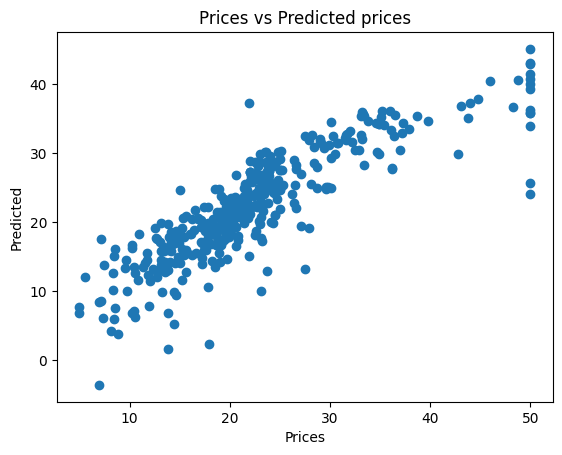

In [82]:
plt.scatter(y_train,y_pred)
plt.xlabel('Prices')
plt.ylabel('Predicted')
plt.title('Prices vs Predicted prices')
plt.show()

Inspecting the Residuals

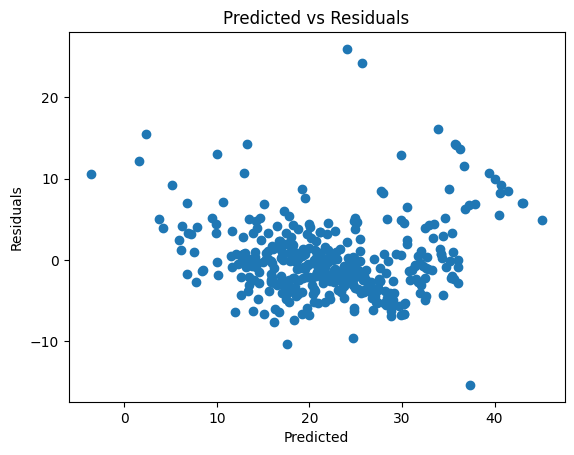

In [83]:
#modelin öğrenemsi ile hata arasındakı uyumu. Yani model doğru bir varsayım yapıyormu

plt.scatter(y_pred,y_train-y_pred)
plt.title("Predicted vs Residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

/tmp/ipython-input-2763557146.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train-y_pred)


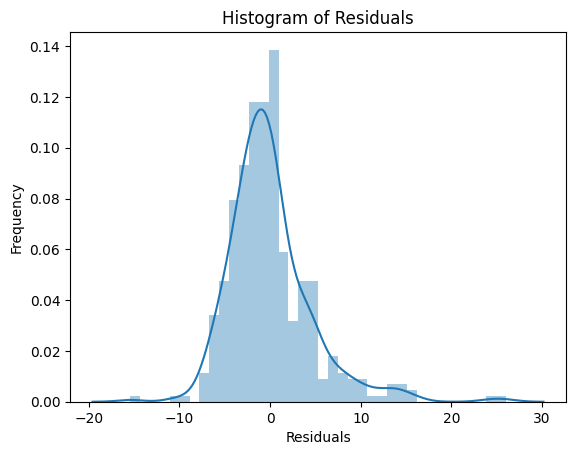

In [84]:
sns.distplot(y_train-y_pred)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show();

Model evaluation for OLS on test Data

In [85]:
#Bu ise modelin gerçek hayatdakı performansını ölçüyor
#yani şimdi yaptığımız hiç görmediği evler için fiyat tahminlemesi yapıyor
y_test_pred=lm.predict(X_test)

In [86]:
#Model gelişimi
acc_linreg=metrics.r2_score(y_test,y_test_pred)
#r kvadratı trainde de yüksek testdede yüksek çıxarsa model iyi öğrenmiştir eğer trainde yüksek testde düşük çıxarsa overfitting yapmıştır
print('R^2:',acc_linreg)
print('Adjusted R^2:',1-(1-metrics.r2_score(y_test,y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test,y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test,y_test_pred))

print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_test_pred)))


R^2: 0.7247276918593646
Adjusted R^2: 0.6840624645204071
MAE: 3.387130983732594
MSE: 25.56983118458244
RMSE: 5.0566620595588985


Random Forest Regressor

In [87]:
from sklearn.ensemble import RandomForestRegressor
reg=RandomForestRegressor()
reg.fit(X_train,y_train)

RandomForestRegressor()

In [88]:
y_pred=reg.predict(X_train)

In [89]:
print('R^2:',metrics.r2_score(y_train,y_pred))
print('Adjusted R^2:',1-(1-metrics.r2_score(y_train,y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train,y_pred))
print('MSE:',metrics.mean_squared_error(y_train,y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train,y_pred)))

R^2: 0.9773838826842118
Adjusted R^2: 0.9766300121070189
MAE: 0.8653193069306919
MSE: 1.8547090866336633
RMSE: 1.3618770453435447


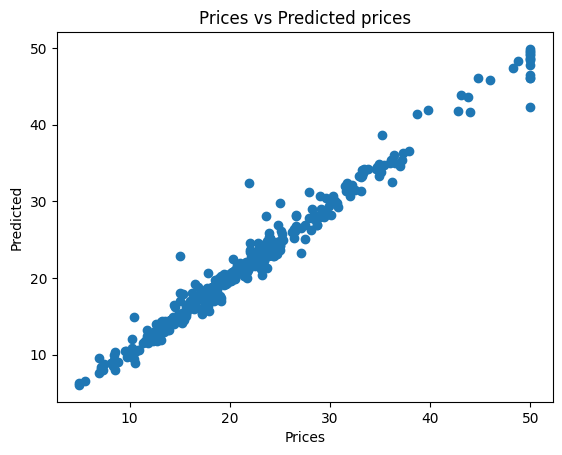

In [90]:
plt.scatter(y_train,y_pred)
plt.xlabel('Prices')
plt.ylabel('Predicted')
plt.title('Prices vs Predicted prices')
plt.show()

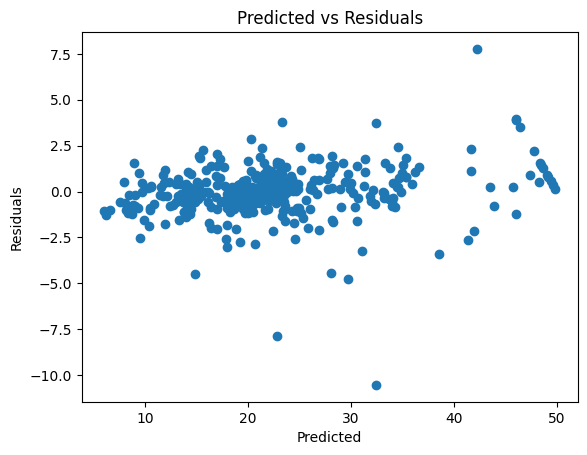

In [91]:
plt.scatter(y_pred,y_train-y_pred)
plt.title("Predicted vs Residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

In [92]:
y_test_pred=reg.predict(X_test)

In [93]:
acc_rf=metrics.r2_score(y_test,y_test_pred)
print('R^2:',acc_rf)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: 0.8157524397153869
Adjusted R^2: 0.7885340501278872
MAE: 2.396490196078432
MSE: 17.11461296078432
RMSE: 4.136981140975182


In [94]:
train_score=reg.score(X_train,y_train)
test_score=reg.score(X_test,y_test)

print("Train Score:",train_score)
print("Test Score:",test_score)

Train Score: 0.9773838826842118
Test Score: 0.8157524397153869
